# Pythonic Syntactic Sugar

The Image Basics Notebook was straight forward and closely follows ITK's C++ interface.

Sugar is great it gives your energy to get things done faster! SimpleITK has applied a generous about of syntactic sugar to help get things done faster too.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', aspect='equal')
import SimpleITK as sitk
# Download data to work on
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

让我们首先开发一种在笔记本中显示图像的便捷方法。

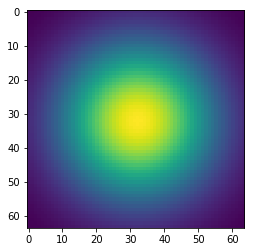

In [2]:
img = sitk.GaussianSource(size=[64]*2)
plt.imshow(sitk.GetArrayViewFromImage(img))

(64, 64)
1


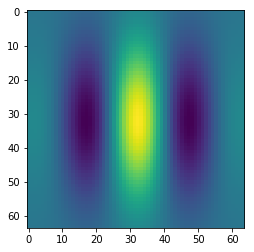

In [9]:
img = sitk.GaborSource(size=[64]*2, frequency=.03)
print(img.GetSize())
print(img.GetNumberOfComponentsPerPixel())
plt.imshow(sitk.GetArrayViewFromImage(img))

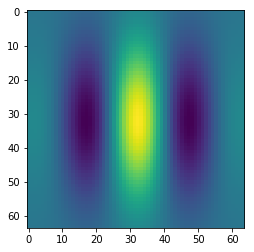

In [6]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)
myshow(img)

## Multi-dimension slice indexing

如果您熟悉numpy，切片索引，那么这应该是SimpleITK图像的蛋糕。 用于1-D对象的Python标准切片接口：

<table>
    <tr><td>Operation</td>	<td>Result</td></tr>
    <tr><td>d[i]</td>	<td>i-th item of d, starting index 0</td></tr>
    <tr><td>d[i:j]</td>	<td>slice of d from i to j</td></tr>
    <tr><td>d[i:j:k]</td>	<td>slice of d from i to j with step k</td></tr>
</table>

使用这种方便的语法，可以轻松完成许多基本任务。

In [4]:
img[24,24]

0.048901304602622986

### Cropping

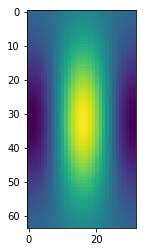

In [10]:
myshow(img[16:48,:])

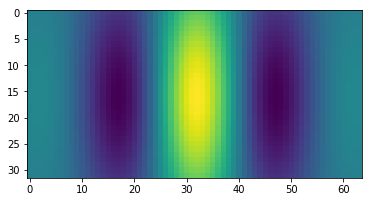

In [11]:
myshow(img[:,16:-16])

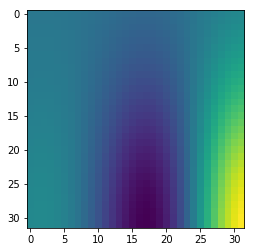

In [12]:
myshow(img[:32,:32])

### Flipping

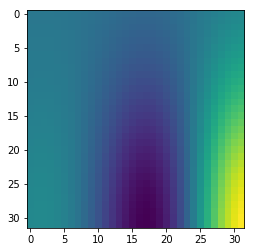

In [13]:
img_corner = img[:32,:32]
myshow(img_corner)

## 水平翻转

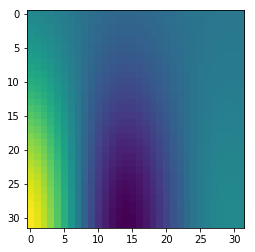

In [14]:
myshow(img_corner[::-1,:])

In [ ]:
myshow(sitk.Tile(img_corner, img_corner[::-1,::],img_corner[::,::-1],img_corner[::-1,::-1], [2,2]))

### Slice Extraction

可以从3D图像中提取2D图像。

TypeError: Invalid dimensions for image data

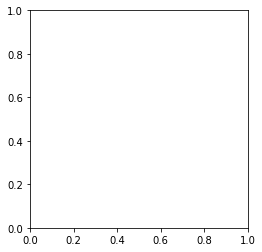

In [15]:
img = sitk.GaborSource(size=[64]*3, frequency=0.05)

# Why does this produce an error?
myshow(img)

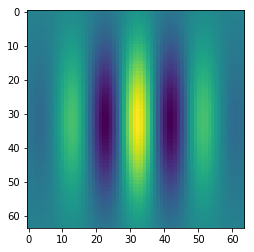

In [16]:
myshow(img[:,:,32])

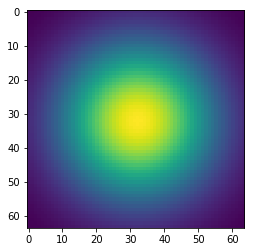

In [17]:
myshow(img[16,:,:])

### Subsampling

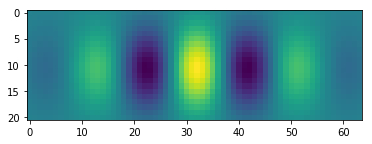

In [18]:
myshow(img[:,::3,32])

## Mathematical Operators

大多数python数学运算符都被重载以调用SimpleITK过滤器，该过滤器以每个像素为基础执行相同的操作。 它们可以在两个图像或图像和标量上操作。 如果使用两个图像，则两者必须具有相同的像素类型。 

输出图像类型通常是相同的。 

由于这些运算符基本上称为ITK过滤器，它只使用原始C ++运算符，因此必须注意防止溢出，并除以零等。

<table>
    <tr><td>Operators</td></tr>
    <tr><td>+</td></tr>
    <tr><td>-</td></tr>
    <tr><td>&#42;</td></tr>
    <tr><td>/</td></tr>
    <tr><td>//</td></tr>
    <tr><td>**</td></tr>
</table>


Fetching cthead1.png


140.0

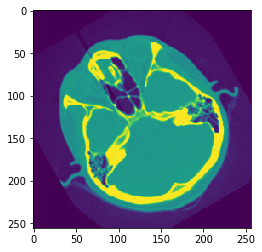

In [19]:
img = sitk.ReadImage(fdata("cthead1.png"))
img = sitk.Cast(img,sitk.sitkFloat32)
myshow(img)
img[150,150]

19600.0

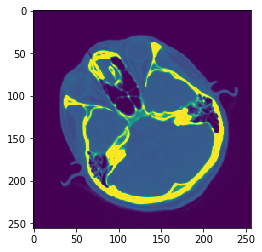

In [20]:
#每个像素位置的值平方操作
timg = img**2
myshow(timg)
timg[150,150]

### Division Operators

所有三个Python除法运算符都实现了\_\_floordiv \_\_，\_\_ udediv \_\_和\_\_div\_\_。 

真正的除法输出是双像素类型。 

请参阅[PEP 238](http://www.python.org/peps/pep-0238)，了解Python为何在Python 3中更改了除法运算符。

### Bitwise Logic Operators

<table>
    <tr><td>Operators</td></tr>
    <tr><td>&</td></tr>
    <tr><td>|</td></tr>
    <tr><td>^</td></tr>
    <tr><td>~</td></tr>
</table>

In [2]:
img = sitk.ReadImage(fdata("cthead1.png"))
nda=sitk.GetArrayFromImage(img)

print("image size:{}".format(img.GetSize()))
print("numpy array shape:{}".format(nda.shape))
myshow(img)

Fetching cthead1.png
image size:(256, 256)
numpy array shape:(256, 256)


NameError: name 'myshow' is not defined

## Comparative Operators
<table>
    <tr><td>Operators</td></tr>
    <tr><td>&gt;</td></tr>
    <tr><td>&gt;=</td></tr>
    <tr><td>&lt;</td></tr>
    <tr><td>&lt;=</td></tr>
    <tr><td>==</td></tr>
</table>

这些比较运算符遵循与二进制图像的SimpleITK重置相同的约定。 它们的像素类型为```sitkUInt8```，值为0和1。
    

Fetching cthead1.png


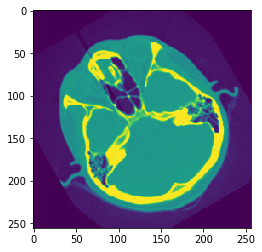

In [22]:
img = sitk.ReadImage(fdata("cthead1.png"))
myshow(img)

### Amazingly make common trivial tasks really trivial

1


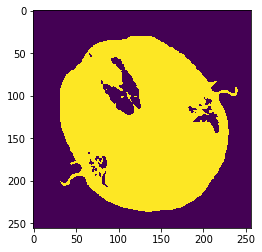

In [31]:
print(sitk.GetArrayFromImage(img>90)[100,200])
myshow(img>90)

1


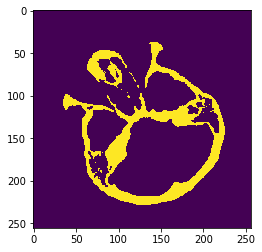

In [34]:
print(sitk.GetArrayFromImage(img>150)[100,200])
myshow(img>150)

2


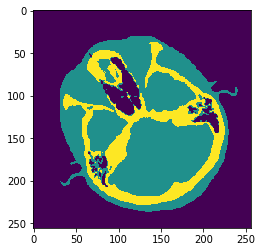

In [35]:
print(sitk.GetArrayFromImage((img>90)+(img>150))[100,200])
myshow((img>90)+(img>150))